In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from IPS import IPS
from AdaIPS_v2 import AdaIPS_S
from getData import getData

In [2]:
# Device setup
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 10)
        
        self.losses = []
        

    def forward(self, x):
        x = x.view(-1, 28*28).float()
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        return self.fc4(x)

In [3]:
epochs = 5
batch_size = 64

In [4]:
trainloader, trainset, testloader, testset = getData('MNIST', batch_size=batch_size)

In [5]:
def train(model, optimizer, epochs=2):
    print(optimizer)
    criterion = nn.CrossEntropyLoss()
    optimizer = optimizer

    num_epochs = epochs
    for epoch in range(num_epochs):
        for i, (inputs, labels) in enumerate(trainloader):
            inputs, labels = inputs.to(device), labels.to(device)

            def closure():
                optimizer.zero_grad()
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                return loss

            loss = optimizer.step(closure)

            if i % 100 == 0:
                print(f'Epoch {epoch+1}, Step {i}, Loss: {loss}')
            model.losses.append(loss.item())

    print("Training complete.")
    return model

In [6]:
def test(model):
    for i, (inputs, labels) in enumerate(testloader):
        output = model(inputs)
        output = output.argmax(axis=1)
        print(accuracy_score(labels, output.detach().numpy()))

In [ ]:
adaIpsModel = SimpleNN().to(device)
adaIpsOptimizer = AdaIPS_S(adaIpsModel.parameters(), T=epochs * (len(trainset)/batch_size), lower_bound=0, beta_1=0.9, beta_2=0.99)
train(adaIpsModel, adaIpsOptimizer, epochs=epochs)

AdaIPS_S (
Parameter Group 0
    T0: 1
    beta_1: 0.9
    beta_2: 0.99
    eps: 1e-08
    lower_bound: 0
)
Epoch 1, Step 0, Loss: 2.319525718688965
Epoch 1, Step 100, Loss: 0.47655001282691956
Epoch 1, Step 200, Loss: 0.26582932472229004
Epoch 1, Step 300, Loss: 0.40789973735809326
Epoch 1, Step 400, Loss: 0.294498473405838
Epoch 1, Step 500, Loss: 0.38867616653442383
Epoch 1, Step 600, Loss: 0.30126953125
Epoch 1, Step 700, Loss: 0.20113369822502136
Epoch 1, Step 800, Loss: 0.1772845983505249
Epoch 1, Step 900, Loss: 0.30432581901550293
Epoch 2, Step 0, Loss: 0.07687868922948837
Epoch 2, Step 100, Loss: 0.09045726805925369
Epoch 2, Step 200, Loss: 0.045823633670806885
Epoch 2, Step 300, Loss: 0.1801379919052124
Epoch 2, Step 400, Loss: 0.02839682251214981
Epoch 2, Step 500, Loss: 0.1188928559422493
Epoch 2, Step 600, Loss: 0.294314980506897
Epoch 2, Step 700, Loss: 0.03714282065629959
Epoch 2, Step 800, Loss: 0.0843319520354271
Epoch 2, Step 900, Loss: 0.39873746037483215
Epoch 3, St

SimpleNN(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=32, bias=True)
  (fc4): Linear(in_features=32, out_features=10, bias=True)
)

In [8]:
ipsModel = SimpleNN().to(device)
ipsOptimizer = IPS(ipsModel.parameters(), T=epochs * (len(trainset) / batch_size), lower_bound=0)
train(ipsModel, ipsOptimizer, epochs=5)

IPS (
Parameter Group 0
    T: 4687.5
    lower_bound: 0
)
Epoch 1, Step 0, Loss: 2.314420223236084
Epoch 1, Step 100, Loss: 0.578070342540741
Epoch 1, Step 200, Loss: 0.5332255363464355
Epoch 1, Step 300, Loss: 0.6469740271568298
Epoch 1, Step 400, Loss: 0.3752712607383728
Epoch 1, Step 500, Loss: 0.727746844291687
Epoch 1, Step 600, Loss: 0.34947624802589417
Epoch 1, Step 700, Loss: 0.44157859683036804
Epoch 1, Step 800, Loss: 0.3074631989002228
Epoch 1, Step 900, Loss: 0.43938735127449036
Epoch 2, Step 0, Loss: 0.5172064900398254
Epoch 2, Step 100, Loss: 0.5148026943206787
Epoch 2, Step 200, Loss: 0.2180193066596985
Epoch 2, Step 300, Loss: 0.4580238461494446
Epoch 2, Step 400, Loss: 0.3673092722892761
Epoch 2, Step 500, Loss: 0.5403255224227905
Epoch 2, Step 600, Loss: 0.4747333526611328
Epoch 2, Step 700, Loss: 0.25147226452827454
Epoch 2, Step 800, Loss: 0.3658400774002075
Epoch 2, Step 900, Loss: 0.6847969889640808
Epoch 3, Step 0, Loss: 0.3744915723800659
Epoch 3, Step 100, Los

SimpleNN(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=32, bias=True)
  (fc4): Linear(in_features=32, out_features=10, bias=True)
)

In [9]:
adamModel = SimpleNN().to(device)
adamOptimizer = torch.optim.Adam(adamModel.parameters(), lr=1e-3)
train(adamModel, adamOptimizer, epochs=5)

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)
Epoch 1, Step 0, Loss: 2.3193113803863525
Epoch 1, Step 100, Loss: 0.30890554189682007
Epoch 1, Step 200, Loss: 0.16019539535045624
Epoch 1, Step 300, Loss: 0.45395705103874207
Epoch 1, Step 400, Loss: 0.3490487039089203
Epoch 1, Step 500, Loss: 0.1763347089290619
Epoch 1, Step 600, Loss: 0.18797050416469574
Epoch 1, Step 700, Loss: 0.08024634420871735
Epoch 1, Step 800, Loss: 0.13830849528312683
Epoch 1, Step 900, Loss: 0.11719336360692978
Epoch 2, Step 0, Loss: 0.15183568000793457
Epoch 2, Step 100, Loss: 0.09765984863042831
Epoch 2, Step 200, Loss: 0.17701523005962372
Epoch 2, Step 300, Loss: 0.13883373141288757
Epoch 2, Step 400, Loss: 0.13284499943256378
Epoch 2, Step 500, Loss: 0.049096278846263885
Epoch 2, Step 600, Loss: 0.20255763828754425
Epoch 2, Step 700, L

SimpleNN(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=32, bias=True)
  (fc4): Linear(in_features=32, out_features=10, bias=True)
)

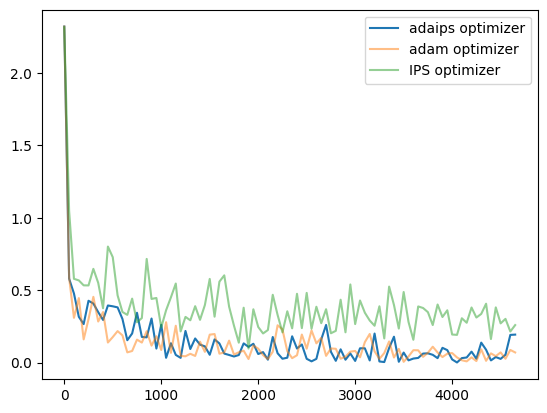

In [10]:
models = [
    (adaIpsModel, 'adaips optimizer'),
    (adamModel, 'adam optimizer'),
    (ipsModel, 'IPS optimizer')
]
exclude = []
focus = [adaIpsModel]
interval = 50
for model in models:
    if model[0] in exclude: continue
    plt.plot(
        [i for i, loss in enumerate(model[0].losses) if i % interval == 0], 
        [loss for i, loss in enumerate(model[0].losses) if i % interval == 0], 
        label=model[1],
        alpha=0.5 if model[0] not in focus else 1
    )

plt.legend()
plt.show()